<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('/datasets/insurance.csv')
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Пропуски в данных не обнаружены. 

In [4]:
df.duplicated().sum()# поиск дубликатов

153

In [5]:
df.loc[df.duplicated(keep=False)].sort_values('Зарплата') 

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
2955,1,32.0,21600.0,0,0
2988,1,32.0,21600.0,0,0
361,0,50.0,24700.0,1,2
2869,0,50.0,24700.0,1,2
333,0,32.0,25600.0,1,0
...,...,...,...,...,...
2465,0,40.0,54000.0,2,0
1042,0,33.0,59300.0,2,0
2231,0,33.0,59300.0,2,0
1418,1,28.0,59900.0,0,0


In [6]:
df = df.drop_duplicates() #удаление дубликатов

In [7]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811842,1.203425,0.152259
std,0.500049,8.487995,9972.953985,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [8]:
def without_hue(ax, feature): # добавим функция для подсчета процентов
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

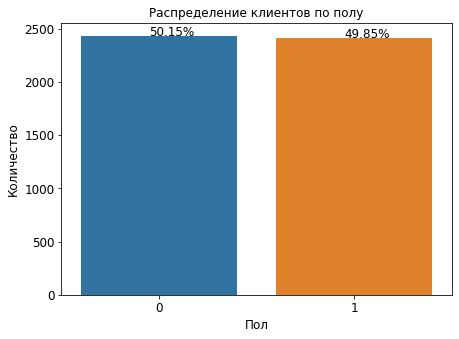

In [9]:
plt.figure(figsize = (7,5))
ax = sns.countplot(x = df['Пол'])
plt.xticks(size=12)
plt.xlabel('Пол',size=12)
plt.yticks(size=12)
plt.ylabel('Количество',size=12)
plt.title('Распределение клиентов по полу')
without_hue(ax,df['Пол'])

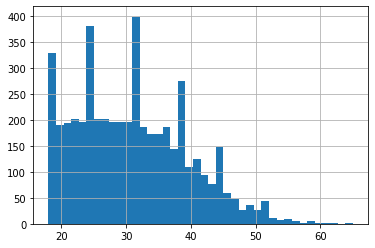

In [10]:
df['Возраст'].hist(grid=True, bins=40);


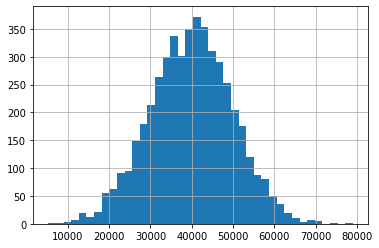

In [11]:
df['Зарплата'].hist(grid=True, bins=40);

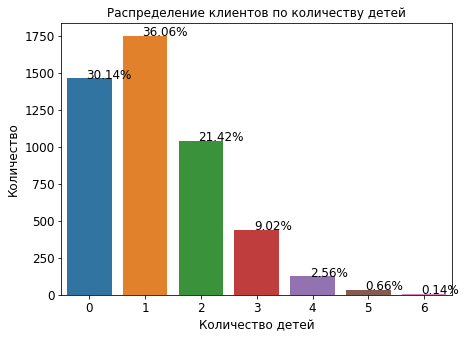

In [12]:
plt.figure(figsize = (7,5))
ax = sns.countplot(x = df['Члены семьи'])
plt.xticks(size=12)
plt.xlabel('Количество детей',size=12)
plt.yticks(size=12)
plt.ylabel('Количество',size=12)
plt.title('Распределение клиентов по количеству детей')
without_hue(ax,df['Члены семьи'])

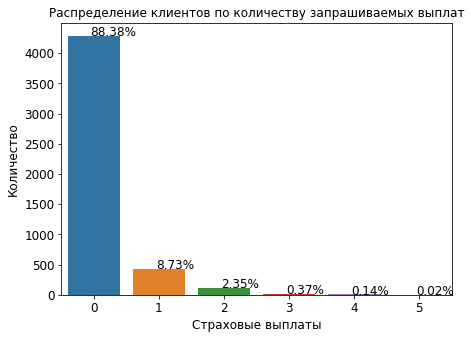

In [13]:
plt.figure(figsize = (7,5))
ax = sns.countplot(x = df['Страховые выплаты'])
plt.xticks(size=12)
plt.xlabel('Страховые выплаты',size=12)
plt.yticks(size=12)
plt.ylabel('Количество',size=12)
plt.title('Распределение клиентов по количеству запрашиваемых выплат')
without_hue(ax,df['Страховые выплаты'])

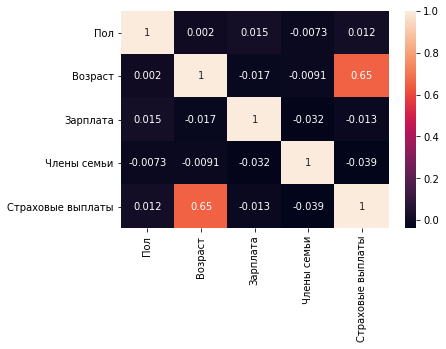

In [14]:
sns.heatmap(df.corr(), annot=True);

Умеренная положительная корреляция между страховыми выплатами и возрастом.В остальных случаях никакой корреляции.

В данной выборке соотношение мужчин и женщин практически одинаковое -  49,85/50,15  
Средний возраст клиентов 31 год, 75% имеют возраст 37 год  
Медианная зарплата ~39900р  
Распределение клиентов по количеству детей:
 - 30% клиентов не имеют детей
 - 36% имеют 1 ребенка
 - 21% имеют 2 ребенка
 - 9% имеют 3 детей
 - имеют больше 3 детей < 4%  
 
В 88% клиенты не запрашивают выплаты.  
Существует умеренная положительная корреляция между страховыми выплатами и возрастом.В остальных случаях никакой корреляции.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Не изменится

**Обоснование:** Так как P обратимая матрица,используя свойства обратимых матриц  

$$
w* = ((XP)^T XP)^{-1} (XP)^T y
$$

$$
w* = (P^TX^T XP)^{-1} P^T X^T y
$$

$$
w* = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

$$
(P^T)^{-1}P^T=E
$$

$$
w* = (P)^{-1}(X^T X)^{-1} X^T y
$$

$$
w* = (P)^{-1}w
$$

$$
a* = XPw*
$$

$$
a* = XP (P)^{-1}w
$$

$$
P (P)^{-1} = E
$$

$$
a* = Xw
$$

$$
a* = a
$$

Если умножать матрицу на обратимую матрицу, предсказания линейной регрессии для матрицы и преобразованной матрицы  не будут значительно отличаться.

## Алгоритм преобразования

**Алгоритм**
1. Создадим рандомно матрицу matrix
2. Проверим на обратимость,если матрица необратима,она нам не подходит.
3. Создадим исходную матрицу'features' из признаков датафрейма,без целевого признака.
4. Исходную матрицу 'features' умножим на обратимую матрицу 'matrix_invert',получим 'features_new'.
5. Посчитаем R2 на исходной матрице 'features'.
6. Посчитаем R2 на 'features_new'.

In [15]:
class LinearRegression:
    def fit(self, features_train, target_train):
        X = np.concatenate((np.ones((features_train.shape[0], 1)), features_train), axis=1)
        y = target_train
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, features_test):
        return features_test.dot(self.w) + self.w0


## Проверка алгоритма

In [16]:
features = df.drop('Страховые выплаты',axis=1)
target = df['Страховые выплаты']

In [17]:
matrix = np.random.normal(size = (4,4))
matrix_invert = np.linalg.inv(matrix)
features_new = features.values @ matrix
features_new = pd.DataFrame(features_new,columns = features.columns)
features_new

,Пол,Возраст,Зарплата,Члены семьи
0,-11008.479823,21227.335348,10982.950865,15379.648233
1,-8421.670608,16253.691050,8403.357769,11764.558127
2,-4650.837326,8979.843397,4642.202481,6497.410377
3,-9266.307034,17854.716209,9239.206931,12945.936618
4,-5787.486371,11166.099449,5776.821710,8085.333161
...,...,...,...,...
4842,-7924.991761,15279.725406,7903.319747,11070.610427
4843,-11636.900584,22430.741928,11606.490137,16259.398740
4844,-7530.859570,14513.387167,7508.859515,10520.516047
4845,-7263.257962,13999.056937,7242.651568,10144.053524


In [18]:
features_new = features_new.values
features_new

array([[-11008.47982298,  21227.33534765,  10982.95086456,
         15379.64823315],
       [ -8421.67060831,  16253.69104965,   8403.35776936,
         11764.55812732],
       [ -4650.83732583,   8979.84339651,   4642.20248087,
          6497.41037706],
       ...,
       [ -7530.8595699 ,  14513.38716669,   7508.85951511,
         10520.51604697],
       [ -7263.25796248,  13999.05693744,   7242.6515681 ,
         10144.0535237 ],
       [ -9015.73128821,  17379.17949324,   8993.79228638,
         12595.75119618]])

In [19]:
model = LinearRegression()
model.fit(features,target)
predict = model.predict(features)
r2_score(target,predict)


0.4302010044852068

In [20]:
model = LinearRegression()
model.fit(features_new,target)
predict = model.predict(features_new)
r2_score(target,predict)


0.4302010044852034

Качество линейной регрессии отличается в пределах вычислительной погрешности. Из этого следует, что для защиты персональных данных, данные можно умножать на обратимую матрицу, при этом качество линейной регрессии не изменится.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования